In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

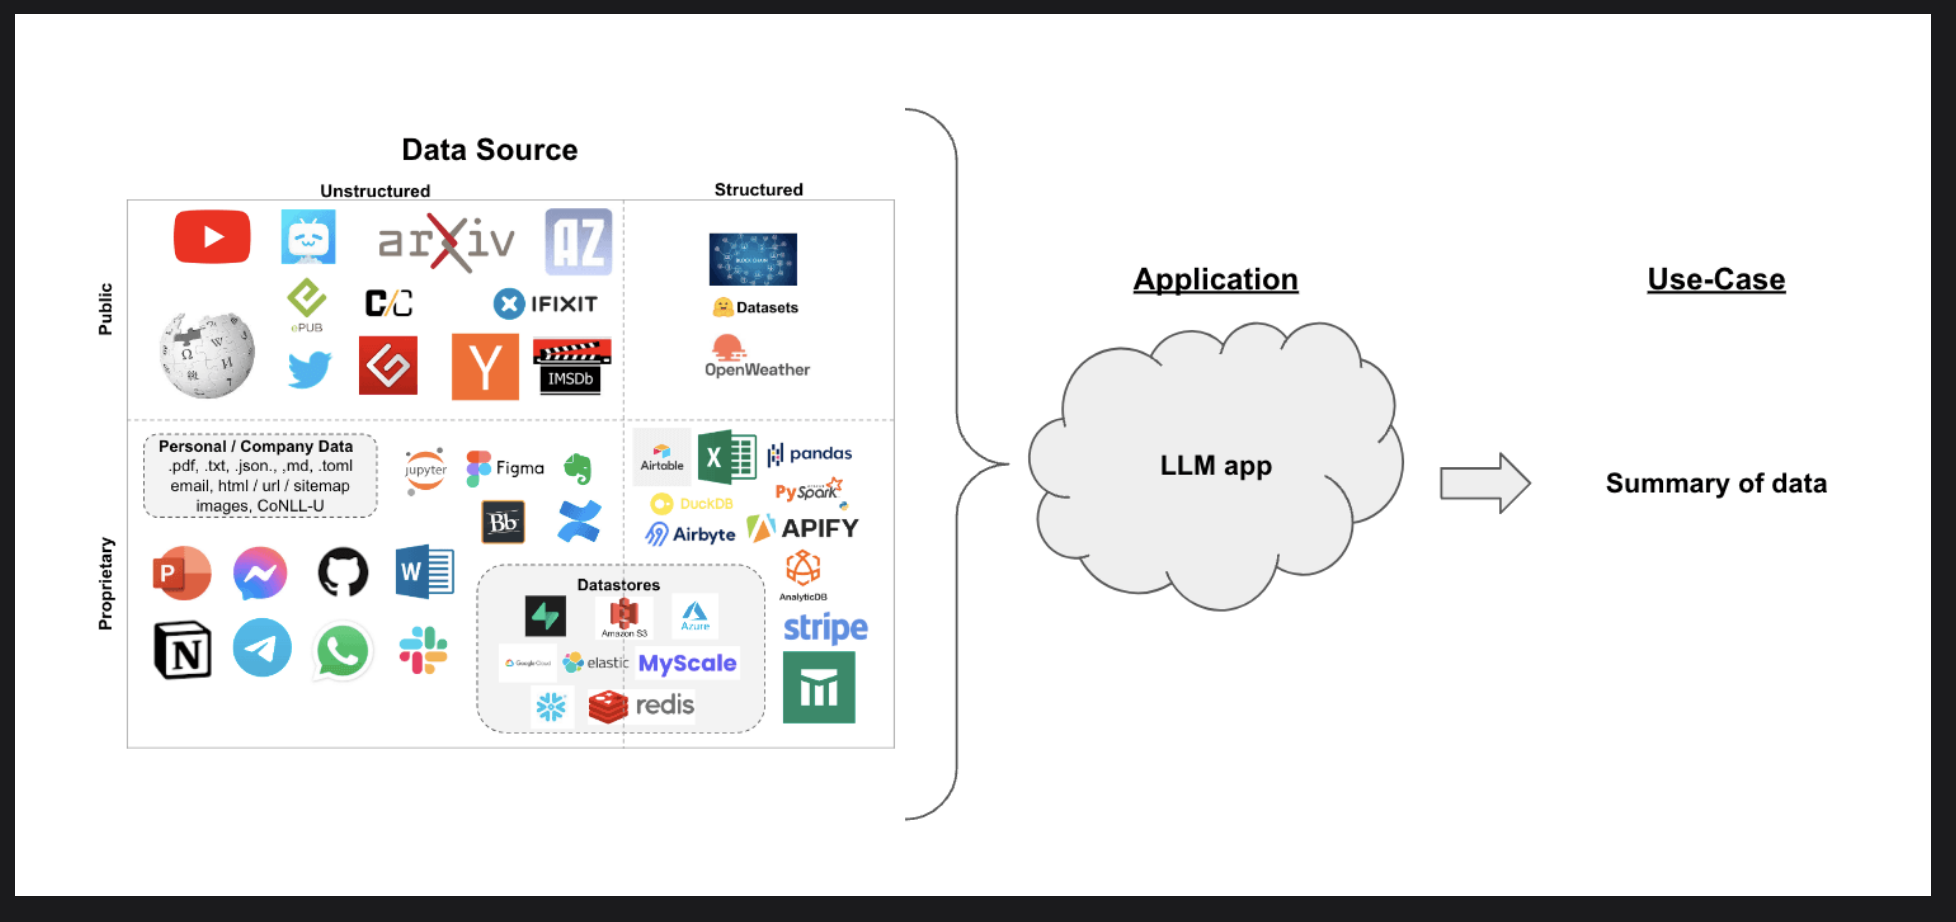

In [2]:
from langchain_groq import ChatGroq
api_key = os.getenv("GROQ_API_KEY")
llm = ChatGroq(groq_api_key=api_key, model="Gemma-7b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x107c6e650>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x107c6d690>, model_name='Gemma-7b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [3]:
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)


In [4]:
speech="""
    People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your 'sevak', ready to participate in this program, much like you.

    In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the government offices for this purpose. The government should reach him. Since you have assigned this responsibility to me, about four crore families have got their ‘pucca’ houses. However, I have encountered cases where someone is left out of the government benefits. Therefore, I have decided to tour the country again, to listen to people’s experiences with government schemes, to understand whether they received the intended benefits, and to ensure that the programs are reaching everyone as planned without paying any bribes. We will get the real picture if we visit them again. Therefore, this ‘Viksit Bharat Sankalp Yatra’ is, in a way, my own examination. I want to hear from you and the people across the country whether what I envisioned and the work I have been doing aligns with reality and whether it has reached those for whom it was meant.

    It is crucial to check whether the work that was supposed to happen has indeed taken place. I recently met some individuals who utilized the Ayushman card to get treatment for serious illnesses. One person met with a severe accident, and after using the card, he could afford the necessary operation, and now he is recovering well. When I asked him, he said: “How could I afford this treatment? Now that there is the Ayushman card, I mustered courage and underwent an operation. Now I am perfectly fine.”  Such stories are blessings to me.

    The bureaucrats, who prepare good schemes, expedite the paperwork and even allocate funds, also feel satisfied that 50 or 100 people who were supposed to get the funds have got it. The funds meant for a thousand villages have been released. But their job satisfaction peaks when they hear that their work has directly impacted someone’s life positively. When they see the tangible results of their efforts, their enthusiasm multiplies. They feel satisfied. Therefore, ‘Viksit Bharat Sankalp Yatra’ has had a positive impact on government officers. It has made them more enthusiastic about their work, especially when they witness the tangible benefits reaching the people. Officers now feel satisfied with their work, saying, “I made a good plan, I created a file, and the intended beneficiaries received the benefits.” When they find that the money has reached a poor widow under the Jeevan Jyoti scheme and it was a great help to her during her crisis, they realise that they have done a good job. When a government officer listens to such stories, he feels very satisfied.

    There are very few who understand the power and impact of the ‘Viksit Bharat Sankalp Yatra’. When I hear people connected to bureaucratic circles talking about it, expressing their satisfaction, it resonates with me. I’ve heard stories where someone suddenly received 2 lakh rupees after the death of her husband, and a sister mentioned how the arrival of gas in her home transformed her lives. The most significant aspect is when someone says that the line between rich and poor has vanished. While the slogan ‘Garibi Hatao’ (Remove Poverty) is one thing, but the real change happens when a person says, “As soon as the gas stove came to my house, the distinction between poverty and affluence disappeared.
"""

In [5]:
speech

"\n    People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your 'sevak', ready to participate in this program, much like you.\n\n    In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of 

In [6]:
chat_message = [
    SystemMessage(content="You are expert with experise in summarizing speeched"),
    HumanMessage(content=f"Please provide a short and concise summary of the follow speech: \n Text: {speech}")
]

In [7]:
llm.get_num_tokens(speech)

/Users/pchowdada/Documents/AI resources/Langchain/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


917

In [8]:
## getting the summary
llm(chat_message)

/var/folders/7d/q_jyz7bs5y55xv3wgnsw7v_c0000gp/T/ipykernel_78051/2694584740.py:1: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  llm(chat_message)


AIMessage(content="**Summary:**\n\nThe speaker, a Member of Parliament, emphasizes the importance of ensuring that government schemes reach their intended beneficiaries without obstacles. He highlights the 'Viksit Bharat Sankalp Yatra' as an initiative to connect with people and assess the impact of government programs. The speaker shares heartwarming stories of beneficiaries who have benefited from schemes like Ayushman and Jeevan Jyoti, demonstrating the positive outcomes of these initiatives. He argues that the yatra has motivated government officials by showcasing the tangible benefits reaching ordinary citizens.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 895, 'total_tokens': 999, 'completion_time': 0.122678374, 'prompt_time': 1.063842989, 'queue_time': 0.17879166999999985, 'total_time': 1.186521363}, 'model_name': 'Gemma-7b-It', 'system_fingerprint': 'fp_7d8efeb0b1', 'finish_reason': 'stop', 'logprobs': None}, id='run-cd58

### Prompt Template  Text Summarization

In [9]:
from langchain.chains import LLMChain
from langchain import PromptTemplate

generictemplate = """
Write a summary of the following speech:
Speech: {speech}
Translate the precise summary to {language}
"""

prompt = PromptTemplate(
    input_variables=["speech", "language"],
    template=generictemplate
)
prompt

PromptTemplate(input_variables=['language', 'speech'], input_types={}, partial_variables={}, template='\nWrite a summary of the following speech:\nSpeech: {speech}\nTranslate the precise summary to {language}\n')

In [11]:
complete_propmt = prompt.format(speech=speech, language ="Telugu")
complete_propmt

"\nWrite a summary of the following speech:\nSpeech: \n    People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your 'sevak', ready to participate in this program, much like you.\n\n    In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get the

In [12]:
llm.get_num_tokens(complete_propmt)

941

In [13]:
llm_chain = LLMChain(llm=llm, prompt=prompt)
summary = llm_chain.run({'speech' : speech, "language": "Telugu"})
summary

/var/folders/7d/q_jyz7bs5y55xv3wgnsw7v_c0000gp/T/ipykernel_78051/3788555789.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(llm=llm, prompt=prompt)
/var/folders/7d/q_jyz7bs5y55xv3wgnsw7v_c0000gp/T/ipykernel_78051/3788555789.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  summary = llm_chain.run({'speech' : speech, "language": "Telugu"})


'**Summary:**\n\nప్రభుత్వ, రాజకీయ, and sociaల్ కార్యకలాాలలో భాగంగా భారత్లోని ప్రజలు, \'विकसित భారత్ సంకल्प యాత్ర\' (Developed India Resolution Journey) విజయానికి తమ సమయం అందిస్తున్నారు. ఎందువల్ల, నేను ఈ ప్రణాళికలో భాగంగా తమ సమయం వాడుకోవాలి.\n\nఇక్కడ, నేను మీతో పాల్గొనేందుకో, మీ \'సేవకు\' గా. భారత్లో ప్రభుత్వాలు రావడం, పథకాలు ఏర్పాటు చేయడం, చర్చలు జరిపించడం, పెద్దలు చేసుకోవడం జరిగింది. 하지만 నాకు నొకడు, ప్రభుత్వపు ప్రణాళికలు లక్ష్యకర్తలకు చేరుకోవడానికి ఏమో అడ్డుపడుతున్నట్లు నను భావిస్తున్నam. \'ప్రధాన మంత్రి ఇంహా యాోయాన\' (ప్రధానమంత్రి నిల్పా నిధి) ఉంటే, ఏడు డుగ్గి, ఇసుకాలు నిల్పా, నిల్పా. ప్రభుత్వం చేరాల్సింది. నేను ఇలా 4 కోటి కుటుడులకు \'పుచ్చ\' ఇళ్ళను ఇచ్చాను. 하지만, నేను కొన్ని కేసుల్లో ఉంది, ప్రభుత్వ లాభాలను లక్ష్యకర్తలు అందుకోవడంలో విఫలమవుతున్నారు. కాబట్టి, నేను దేశమంతట తిరిగి యాత్రించను, ప్రజలను ప్రభుత్వ పథకాలతో ఎలా పరిణామాలున్నాయో తెలుసుకో.\n\nఈ \'विकसित భారత్ సంకल्प యాత్ర\' యొక్క లక్ష్యం, ప్రభుత్వ అధికారులను ఈ పనుకు ప్రేరణ చేయడం. వారు ఒకప్పుడు \'ఐయ్యూషన్\' కార్డును ఉపయోగించి seriou

## StuffDocumentChain Text Summarization

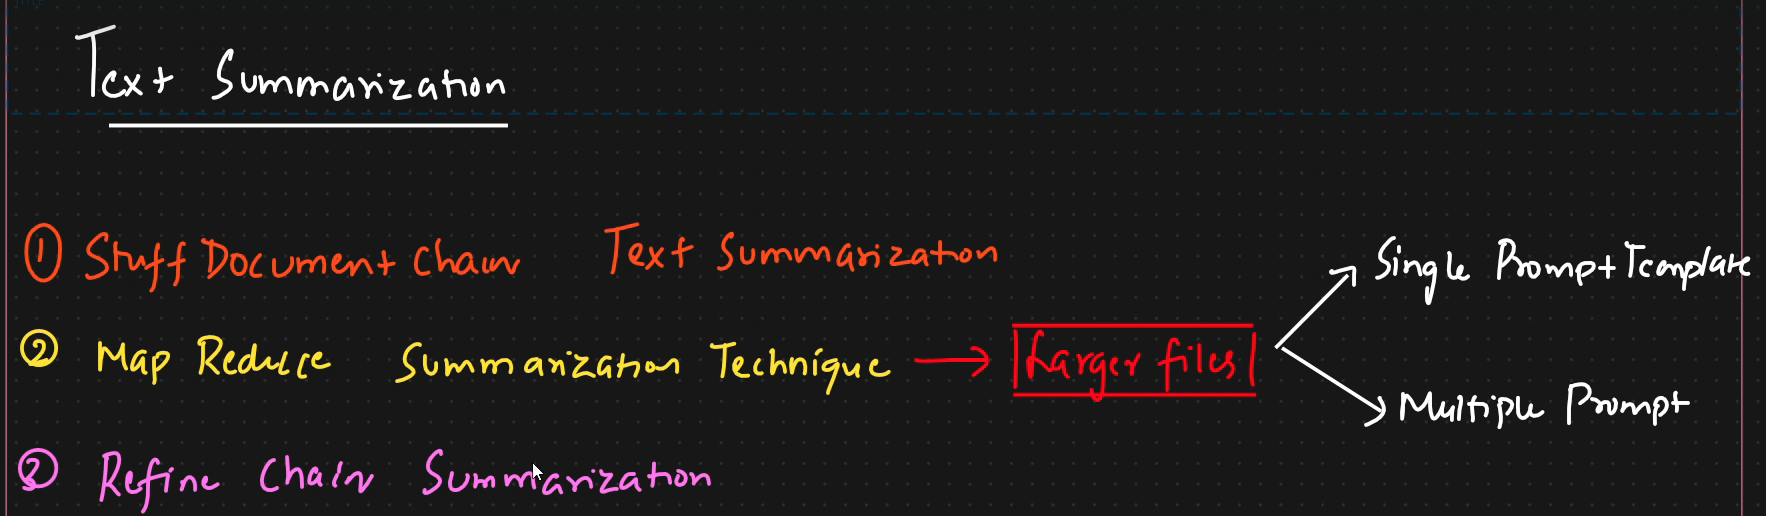
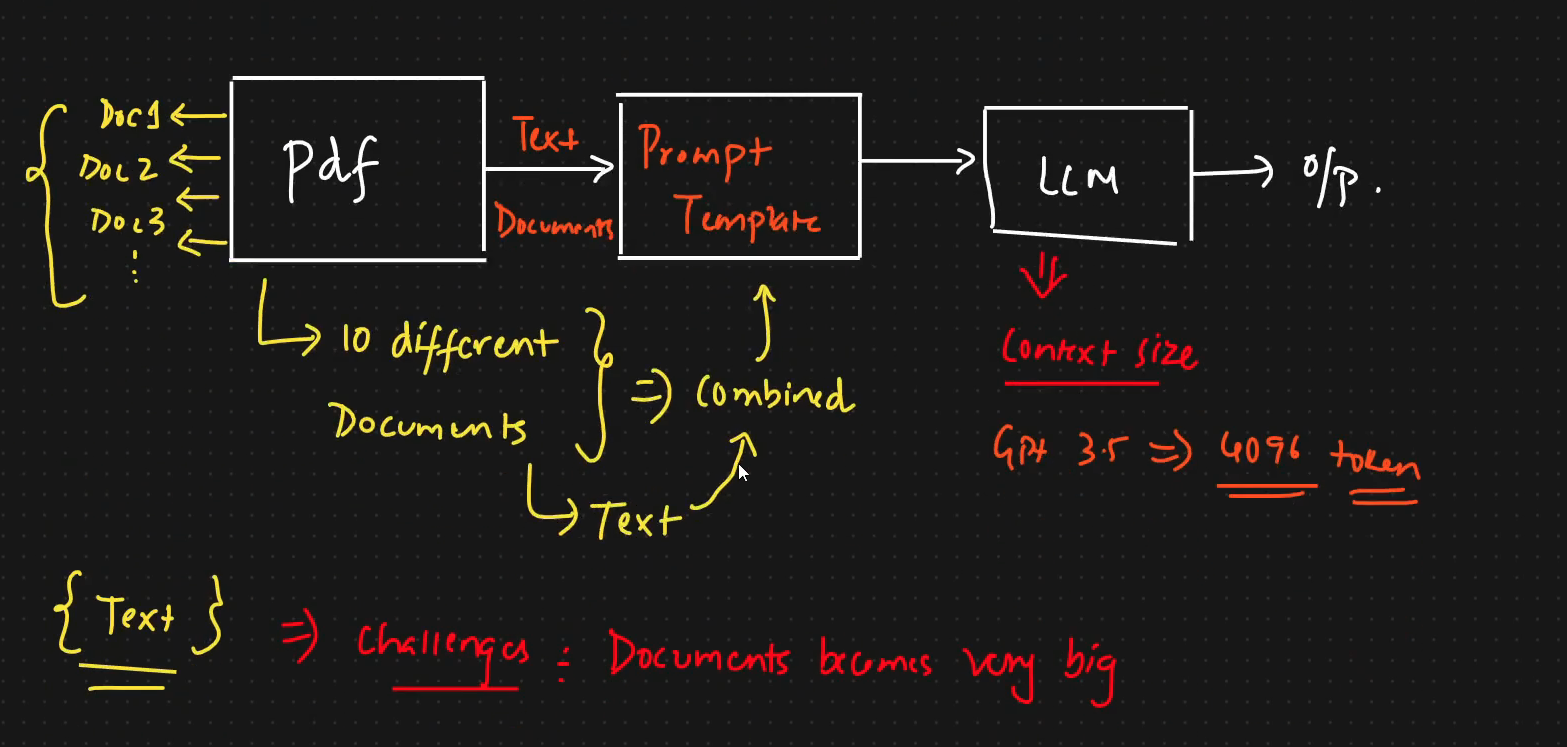
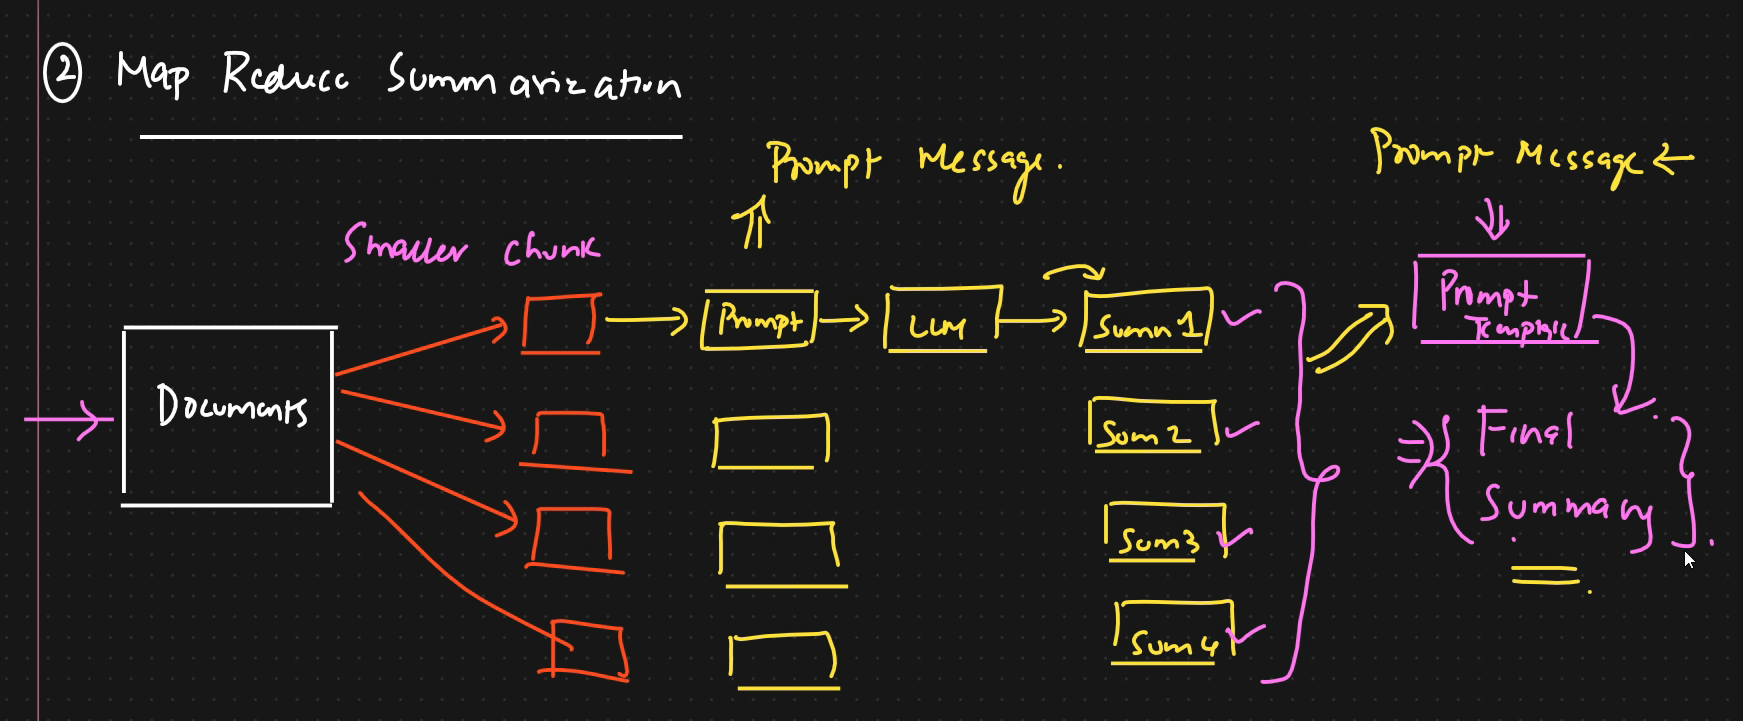
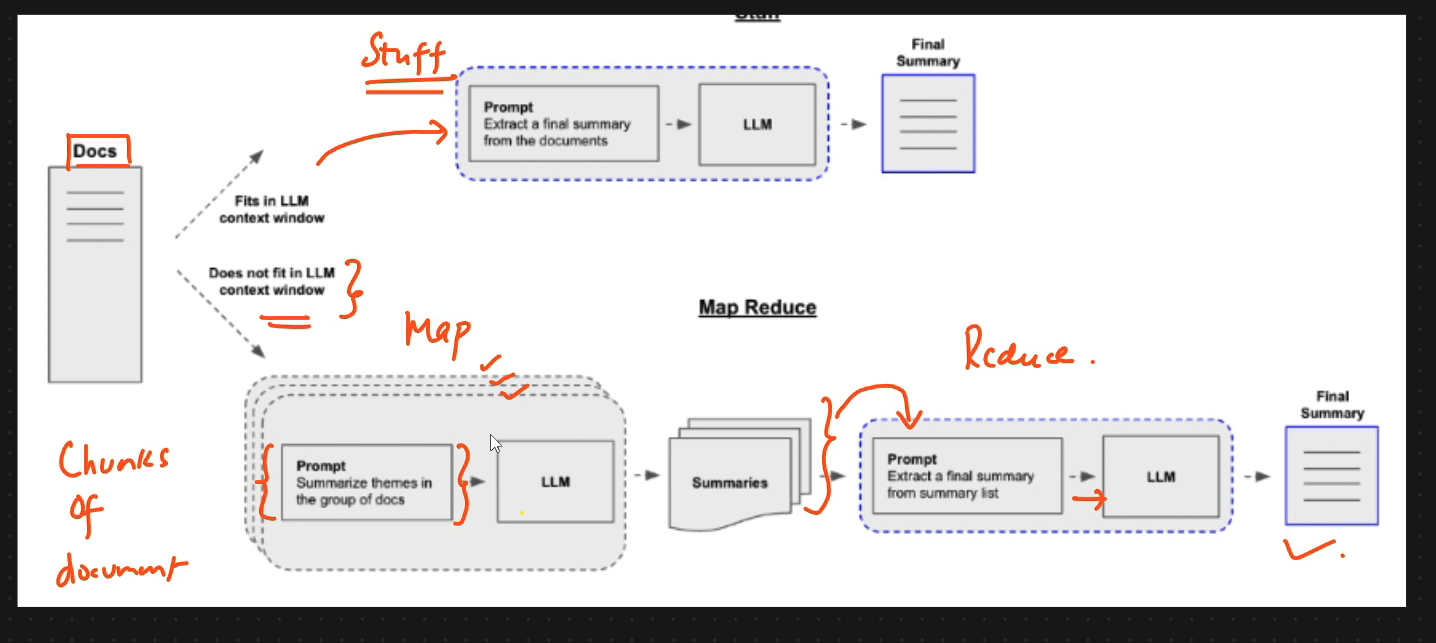

### StuffDocumentChain Text Summarization

In [14]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("apjspeech.pdf")
docs = loader.load()
docs

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowin

In [15]:
template = """ Write a concise and short summary of the following speech 
Speech: {text}
"""
prompt = PromptTemplate(input_variables=["text"], template=template)

In [16]:
from langchain.chains.summarize import load_summarize_chain

In [17]:
chain = load_summarize_chain(llm, chain_type='stuff', prompt=prompt, verbose=True)
output_summary = chain.run(docs)



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
 Write a concise and short summary of the following speech 
Speech: A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online int

In [18]:
output_summary

"## Summary of A P J Abdul Kalam's Departing Speech\n\n**Themes:**\n\n* Empowering rural communities\n* Enhancing agricultural productivity\n* Overcoming disaster through partnerships\n* Promoting connectivity for societal transformation\n* Strengthening national defense\n* Empowering the youth for a developed India by 2020\n\n**Key Points:**\n\n* **Empowering rural communities:** Focus on initiatives like PURA in Tamil Nadu where technological, financial, and educational resources are provided to villages, leading to economic development and entrepreneurship.\n\n\n* **Boosting agriculture:** Emphasis on doubling agricultural production through technological innovations and empowering farmers.\n\n\n* **Disaster management:** Highlighting the courage and resilience of people affected by natural disasters like the Tsunami and the earthquake in Kashmir.\n\n\n* **Promoting connectivity:** Proposal for a Pan African e-Network to connect African countries through satellite, fiber optics, and

### Map Reduce to summarize large document

In [19]:
from langchain.text_splitter import RecursiveCharacterTextSplitter


In [20]:
docs

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowin

In [21]:
final_documents = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=100).split_documents(docs)
final_documents


[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowin

In [23]:
chunks_prompt = """
Please summarize the below speech:
Speech: '{text}'
Summary:
"""

map_prompt_template = PromptTemplate(input_variables=['text'], template=chunks_prompt)

In [27]:
final_prompt="""
Provide the final summary of the entire speech with these important points.
Add a Motivatoin Title, Start the precise summary with an introdcution and provide the summary in number
points for the speech.
Speech:{text}

"""
final_prompt_template = PromptTemplate(template=final_prompt, input_variables=["text"])
final_prompt_template

PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='\nProvide the final summary of the entire speech with these important points.\nAdd a Motivatoin Title, Start the precise summary with an introdcution and provide the summary in number\npoints for the speech.\nSpeech:{text}\n\n')

In [31]:
summary_chain = load_summarize_chain(llm=llm, chain_type='map_reduce', verbose=True, map_prompt=map_prompt_template, combine_prompt=final_prompt_template)

output = summary_chain.run(final_documents)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Please summarize the below speech:
Speech: 'A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have m

Token indices sequence length is longer than the specified maximum sequence length for this model (2072 > 1024). Running this sequence through the model will result in indexing errors



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Provide the final summary of the entire speech with these important points.
Add a Motivatoin Title, Start the precise summary with an introdcution and provide the summary in number
points for the speech.
Speech:**Summary:**

Former President of India, A P J Abdul Kalam, delivers a departing speech reflecting on his five-year tenure. He expresses his gratitude to the people of India, highlighting the remarkable collaboration he experienced from diverse stakeholders across all sectors. Kalam emphasizes the following key messages:

* **Accelerating Development:** Emphasizing the importance of empowering young generations to drive the nation's progress.


* **Empowering Villages:** Focusing on rural development and strengthening agricultural practices.


* **Mobilizing Rural Expertise:** Encouraging the utilization of local knowledge and skills to boost competitiveness.


* **Seed to Food:** Promoting sustainab

In [32]:
output

'## Speech Summary:\n\n**Title: Empowering the Nation for a Developed India**\n\n**Introduction:**\n\nThis speech emphasizes the importance of empowering individuals, particularly the youth, to achieve the vision of a developed India by 2020. It highlights the need to focus on rural development, agricultural growth, and connectivity.\n\n**Key Points:**\n\n**1. Empowering Rural India:**\n\n- Emphasis on connecting rural areas with infrastructure, education, and healthcare.\n- Mention of the Periyar PURA initiative in Thanjavur, Tamil Nadu, as a successful model for rural development.\n\n\n**2. Connecting for Transformation:**\n\n- Importance of digital connectivity for societal transformation.\n- Highlight of the Pan African e-Network project to connect African countries.\n\n\n**3. Empowering the Youth:**\n\n- Emphasis on the potential of the youth to achieve the vision of "Developed India 2020."\n- Mention of the Lead India 2020 Foundation\'s efforts to empower youth through value-base

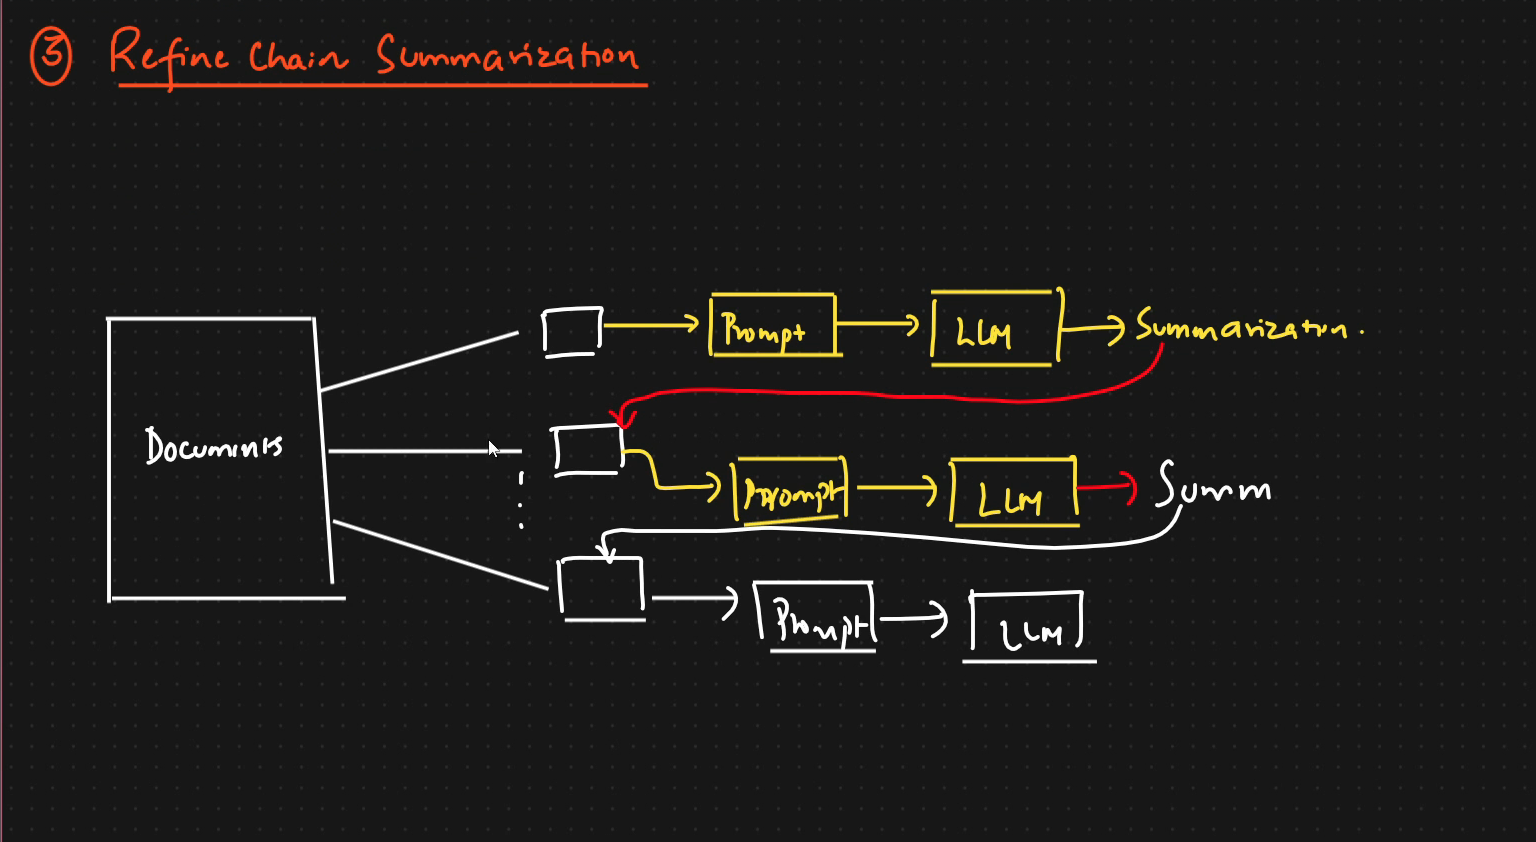

### Refine Chain for Summarization

In [33]:
chain = load_summarize_chain(
    llm=llm,
    chain_type="refine",
    verbose=True
)
output_summary = chain.run(final_documents)
output_summary



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have many

'## Refined Summary:\n\nIn his departing speech, former President A P J Abdul Kalam expressed gratitude for his five-year tenure and outlined nine key messages focused on development, empowerment, and youth engagement. He emphasized the importance of overcoming challenges, fostering partnerships, and strengthening national defense.\n\nThe speech also highlighted impactful initiatives in Thanjavur district, Tamil Nadu. With the support of Periyar Maniammai College of Engineering for Women, the region has witnessed technological collaboration leading to innovative products and community empowerment. Kalam also emphasized the importance of agricultural growth, highlighting initiatives like the "Seed to Food" project.\n\nFurthermore, Kalam shared personal stories showcasing remarkable human potential and resilience, including his visits to disaster-stricken areas and his vision for youth empowerment. He expressed pride in the dedication of the Indian Armed Forces and para-military forces.\